In [1]:
from coupled_euler import *
import matplotlib.pyplot as plt
%matplotlib widget


$$
\begin{align*}
\frac{d^2 x}{dt^2} &= \frac{-k}{m}x \\
\implies \frac{dx}{dt} &= \frac{-k}{m}xt + C \\
C &= \left. (x' - \frac{-k}{m}xt) \right|_{t=a} \\
\implies x' &= \frac{-k}{m}xt + \text{known constant}
\end{align*}
$$

this is infact true for all equations,
$$
\frac{d^2 x}{dt^2} = f(x)
$$
and if $f(x)=mx+b $  then, 
$$
\frac{dx}{dt} = f(x)t + x''(a)- f(x(a))a
$$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
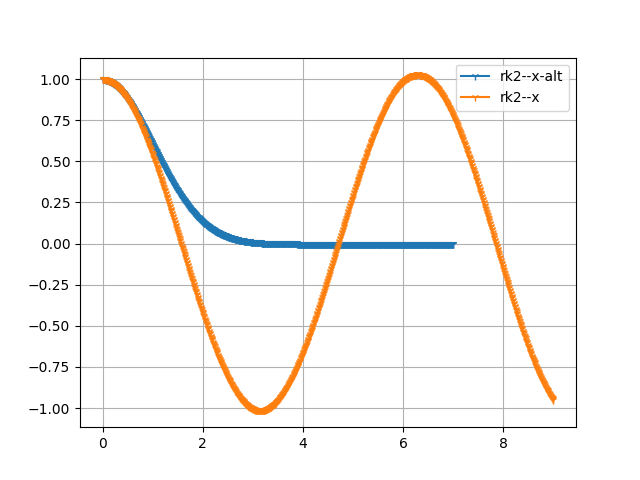

In [6]:
## Simple Harmonic Oscillator
k,m = 1,1
a,xa,xxa = 0,1,0
simple_pendulum = set_problem(
    [ lambda t,x : -k/m*x*t + k/m*xa*a + xxa,],
    (0,7),(a,xa),1000,["t","x-alt"]
)
simple_pendulum2 = set_problem(
    [ lambda t,x,y : y , lambda t,x,y : -k/m*x ],
    (0,9),(a,xa,xxa),1000,["t","x"]
)
simple_pendulum.rk2()
simple_pendulum2.rk2()
fig,ax = plt.subplots(1,1)
simple_pendulum.jt_plot(ax,1)
simple_pendulum2.jt_plot(ax,1)
plt.grid()
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
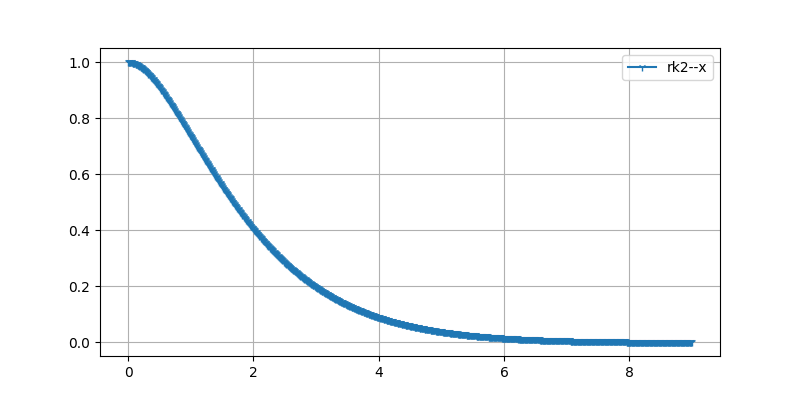

In [13]:
## Damped Harmonic Oscillator
k,m,b = 1,1,2
a,xa,xxa = 0,1,0
simple_pendulum = set_problem(
    [ lambda t,x,y : y , lambda t,x,y : -k/m*x -b/m*y ],
    (0,9),(a,xa,xxa),1000,["t","x"]
)
simple_pendulum.rk2()
fig,ax = plt.subplots(1,1,figsize=(8,4))
simple_pendulum.jt_plot(ax,1)
plt.grid()
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
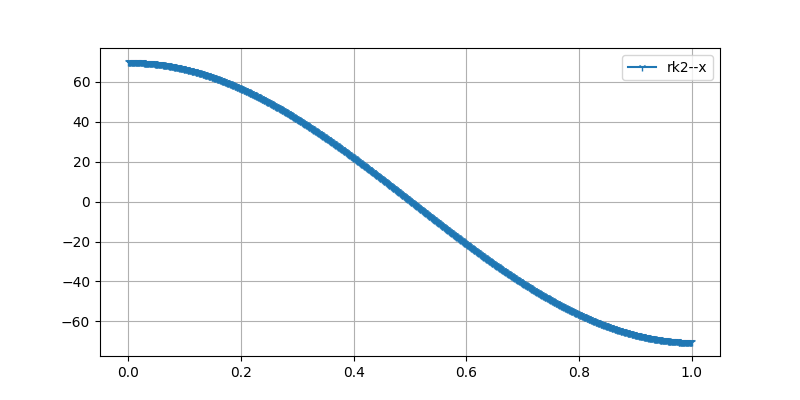

In [16]:
#Simple pendulum
g,L = 9.8,1
a,xa,xxa = 0,np.radians(70),0

simple_pendulum = set_problem(
    [ lambda t,x,y : y , lambda t,x,y : -g/L*x ],
    (0,1),(a,xa,xxa),1000,["t","x"]
)
simple_pendulum.rk2()
simple_pendulum.dat["rk2"][:,1]=np.degrees(simple_pendulum.dat["rk2"][:,1])
fig,ax = plt.subplots(1,1,figsize=(8,4))
simple_pendulum.jt_plot(ax,1)
plt.grid()
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
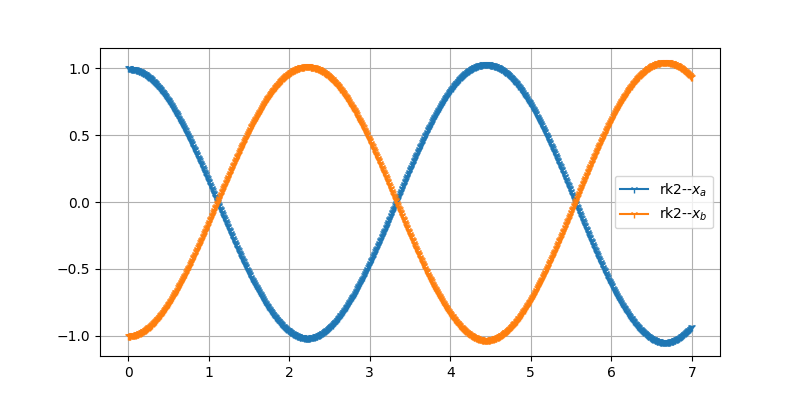

In [10]:
#Coupled pendulum
k,m = 1,1
a,x_a,x_b,y_a,y_b = 0,1,-1,0,0
w = 1
simple_pendulum = set_problem(
    [ lambda t,xa,xb,ya,yb : ya, lambda t,xa,xb,ya,yb : yb,
     lambda t,xa,xb,ya,yb : -(w**2 + k/m)*xa,  lambda t,xa,xb,ya,yb : -(w**2 + k/m)*xb],
    (0,7),(a,x_a,x_b,y_a,y_b),1000,["t","$x_a$","$x_b$","$x'_a$","$x'_b$"]
)
simple_pendulum.rk2()
fig,ax = plt.subplots(1,1,figsize=(8,4))
simple_pendulum.jt_plot(ax,1)
simple_pendulum.jt_plot(ax,2)
plt.grid()
plt.legend()
plt.show()